In [13]:
# from MeleeVODParser import MeleeVODParser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors.kde import KernelDensity
from scipy.signal import argrelmin
from scipy.stats import gaussian_kde

In [5]:
stream = "n0ne.mp4"
match = MeleeVODParser(stream)

NameError: name 'MeleeVODParser' is not defined

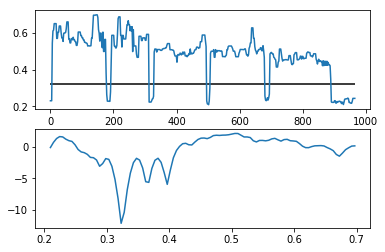

In [18]:
corr_series = pd.read_csv("../data/leffen.csv")
kde = KernelDensity(kernel='gaussian', bandwidth=.005)
kde.fit(np.array(corr_series['median']).reshape(-1, 1))
x = np.linspace(corr_series['median'].min(), corr_series['median'].max(), num=100)
y = kde.score_samples(x.reshape(-1, 1))
rel_mins = argrelmin(y)[0]
split = x[min(rel_mins, key=lambda m: y[m])]

plt.subplot(211)
plt.plot(corr_series['time'],corr_series['median'])
plt.hlines(split, corr_series['time'].min(), corr_series['time'].max())
plt.subplot(212)
plt.plot(x, y)